In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
train = pd.read_csv('C:/Users/99617/Desktop/学习文档/COMP5434 BDCproject/training.csv')
validation = pd.read_csv('C:/Users/99617/Desktop/学习文档/COMP5434 BDCproject/validation.csv')
test = pd.read_csv('C:/Users/99617/Desktop/学习文档/COMP5434 BDCproject/testing.csv')

In [17]:
train.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...","February 28, 2012",22,Mild Side Effects,5
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...","May 17, 2009",17,Severe Side Effects,4
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""","September 29, 2017",3,No Side Effects,5
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...","March 5, 2017",35,Mild Side Effects,5
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...","October 22, 2015",4,Severe Side Effects,5


In [5]:
# Merging the train and validation data
data = pd.concat([train,validation])
data.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...","February 28, 2012",22,Mild Side Effects,5
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...","May 17, 2009",17,Severe Side Effects,4
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""","September 29, 2017",3,No Side Effects,5
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...","March 5, 2017",35,Mild Side Effects,5
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...","October 22, 2015",4,Severe Side Effects,5


In [6]:
train.describe()

,recordId,usefulCount,rating
count,6999.000000,6999.000000,6999.000000
mean,117818.948564,28.189027,3.712102
std,66920.098771,40.007725,1.556816
min,6.000000,0.000000,1.000000
25%,59038.000000,6.000000,2.000000
50%,118973.000000,16.000000,4.000000
75%,175369.000000,35.000000,5.000000
max,232143.000000,949.000000,5.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   recordId       6999 non-null   int64 
 1   drugName       6999 non-null   object
 2   condition      6965 non-null   object
 3   reviewComment  6999 non-null   object
 4   date           6999 non-null   object
 5   usefulCount    6999 non-null   int64 
 6   sideEffects    6999 non-null   object
 7   rating         6999 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 437.6+ KB


In [8]:
# Null values
train.isnull().sum(axis =0)

recordId          0
drugName          0
condition        34
reviewComment     0
date              0
usefulCount       0
sideEffects       0
rating            0
dtype: int64

In [18]:
objects = []
for i in train.columns:
    if train[i].dtype == object:
        objects.append(i)
train.update(train[objects].fillna('None'))

In [19]:
train.isnull().sum(axis =0)

recordId         0
drugName         0
condition        0
reviewComment    0
date             0
usefulCount      0
sideEffects      0
rating           0
dtype: int64

In [20]:
train.shape

(6999, 8)

In [12]:
conditions = train.condition.value_counts().sort_values(ascending=False)
conditions[:15]

Birth Control                1265
Depression                    427
Pain                          270
Anxiety                       248
Acne                          234
Bipolar Disorde               186
Weight Loss                   182
Insomnia                      154
ADHD                          139
Obesity                       130
Vaginal Yeast Infection       113
Emergency Contraception       110
Diabetes, Type 2              103
Abnormal Uterine Bleeding      91
Bowel Preparation              81
Name: condition, dtype: int64

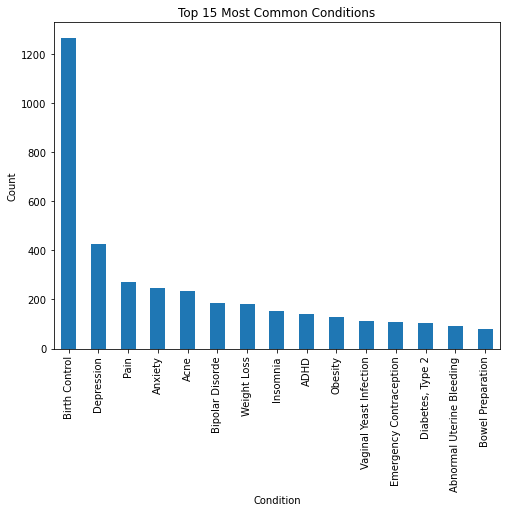

In [13]:
plt.rcParams['figure.figsize'] = [8,6]
conditions[:15].plot(kind='bar')
plt.title('Top 15 Most Common Conditions')
plt.xlabel('Condition')
plt.ylabel('Count');

In [50]:
drugnames = train.drugName.value_counts().sort_values(ascending=False)
drugnames[:15]

Levonorgestrel                        174
Etonogestrel                          145
Ethinyl estradiol / norethindrone     102
Ethinyl estradiol / levonorgestrel     86
Nexplanon                              82
Ethinyl estradiol / norgestimate       80
Phentermine                            71
Sertraline                             62
Implanon                               54
Escitalopram                           54
Mirena                                 52
Gabapentin                             50
Duloxetine                             49
Tramadol                               49
Medroxyprogesterone                    47
Name: drugName, dtype: int64

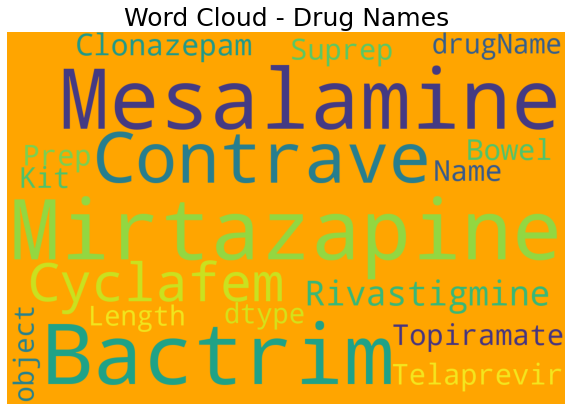

In [51]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'orange', stopwords = stopwords, width = 1200, height = 800).generate(str(train['drugName']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

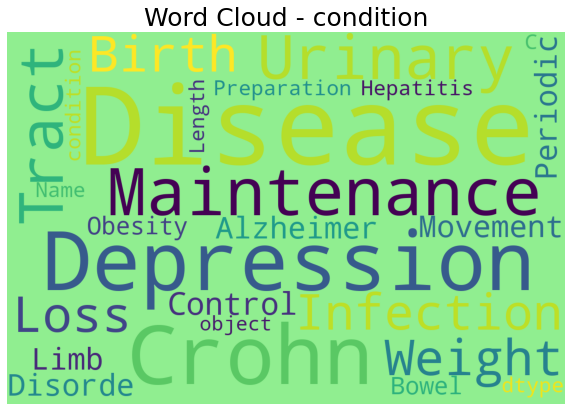

In [56]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'lightgreen', stopwords = stopwords, width = 1200, height = 800).generate(str(train['condition']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Word Cloud - condition', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

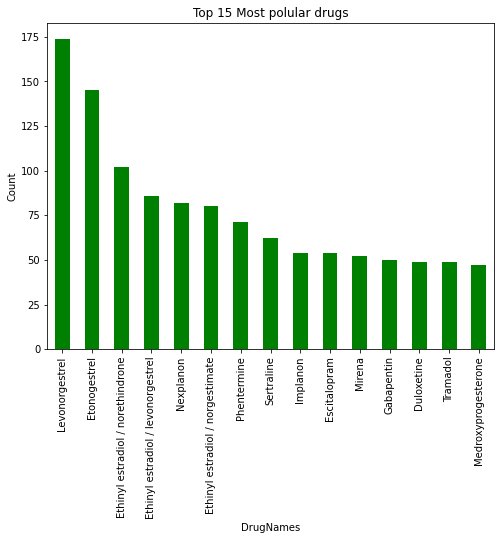

In [64]:
plt.rcParams['figure.figsize'] = [8,6]
drugnames[:15].plot(kind='bar', color = 'green')
plt.title('Top 15 Most polular drugs')
plt.xlabel('DrugNames')
plt.ylabel('Count');

In [16]:
ratings = data.rating.value_counts().sort_values(ascending=False)
ratings

5    4004
1    1492
4    1384
3     691
2     588
Name: rating, dtype: int64

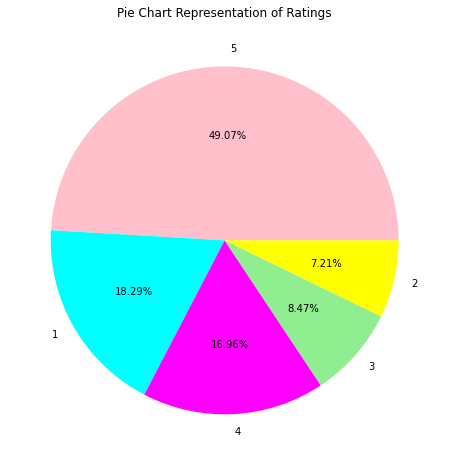

In [59]:
# making a donut chart to represent share of each ratings
labels = "5", "1", "4", "3", "2"
values = [4004, 1492, 1384, 691, 588]
colors = ['pink', 'cyan', 'magenta', 'lightgreen', 'yellow']

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(values, colors = colors, labels = labels, autopct = '%.2f%%')
plt.title('Pie Chart Representation of Ratings')
plt.show()

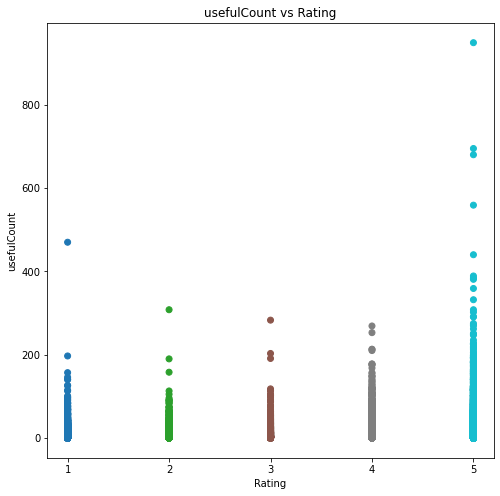

In [61]:
# The correlation between rating and usefulCount
plt.scatter(train.rating, train.usefulCount, c=train.rating.values, cmap='tab10')
plt.title('usefulCount vs Rating')
plt.xlabel('Rating')
plt.ylabel('usefulCount')
plt.xticks([i for i in range(1, 6)]);

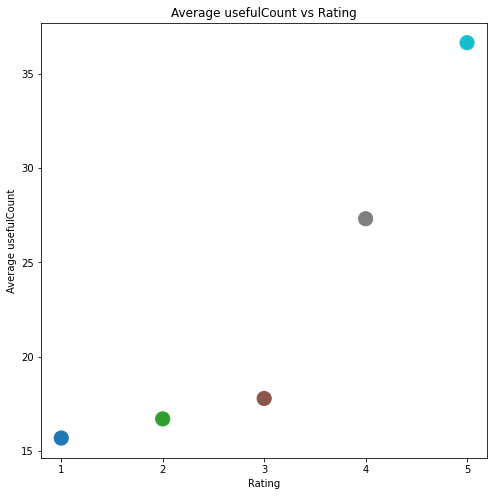

In [19]:
use_ls = []

for i in range(1, 6):
    use_ls.append([i, np.sum(train[train.rating == i].usefulCount) / np.sum([train.rating == i])])
    
use_arr = np.asarray(use_ls)

plt.scatter(use_arr[:, 0], use_arr[:, 1], c=use_arr[:, 0], cmap='tab10', s=200)
plt.title('Average usefulCount vs Rating')
plt.xlabel('Rating')
plt.ylabel('Average usefulCount')
plt.xticks([i for i in range(1, 6)]);

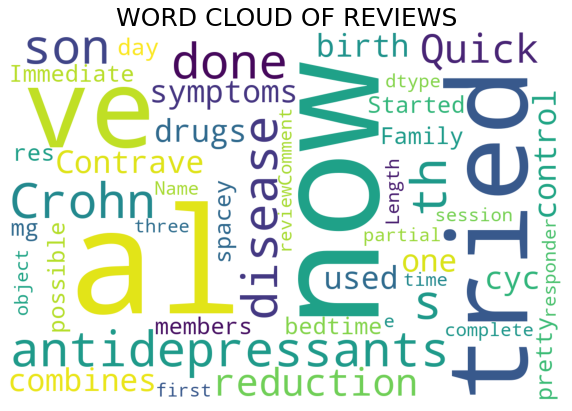

In [21]:
#visualization of reviews

from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopwords, width = 1200, height = 800).generate(str(train['reviewComment']))

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('WORD CLOUD OF REVIEWS', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [75]:
#Label Encoding Drugname and condition
from sklearn.preprocessing import LabelEncoder
for feature in ['drugName', 'condition','sideEffects','sentiment_label']:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature])

In [76]:
train.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating,Year,month,day,sentiment,sentiment_label
0,163740,775,115,"""I&#039;ve tried a few antidepressants over th...",2012-02-28,22,1,5,2012,2,28,0.000000,1
1,206473,727,109,"""My son has Crohn&#039;s disease and has done ...",2009-05-17,17,4,4,2009,5,17,0.566667,2
2,159672,141,381,"""Quick reduction of symptoms""",2017-09-29,3,3,5,2017,9,29,0.333333,2
3,39293,276,396,"""Contrave combines drugs that were used for al...",2017-03-05,35,1,5,2017,3,5,0.139063,2
4,97768,291,68,"""I have been on this birth control for one cyc...",2015-10-22,4,4,5,2015,10,22,0.260926,2


In [23]:
sideEffects_sort = data.sideEffects.value_counts().sort_values(ascending=False)
sideEffects_sort

Mild Side Effects                2689
No Side Effects                  2427
Moderate Side Effects            1620
Severe Side Effects               971
Extremely Severe Side Effects     452
Name: sideEffects, dtype: int64

In [24]:
#labeling sideEffects
data.loc[data["sideEffects"] == "Extremely Severe Side Effects","sideEffects"] = 0
data.loc[data["sideEffects"] == "Severe Side Effects","sideEffects"] = 1
data.loc[data["sideEffects"] == "Moderate Side Effects","sideEffects"] = 2
data.loc[data["sideEffects"] == "Mild Side Effects","sideEffects"] = 3
data.loc[data["sideEffects"] == "No Side Effects","sideEffects"] = 4

In [25]:
data.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating
0,163740,833,123,"""I&#039;ve tried a few antidepressants over th...","February 28, 2012",22,3,5
1,206473,785,116,"""My son has Crohn&#039;s disease and has done ...","May 17, 2009",17,1,4
2,159672,153,402,"""Quick reduction of symptoms""","September 29, 2017",3,4,5
3,39293,300,417,"""Contrave combines drugs that were used for al...","March 5, 2017",35,3,5
4,97768,315,73,"""I have been on this birth control for one cyc...","October 22, 2015",4,1,5


In [70]:
# converting the date into datetime format
train['date'] = pd.to_datetime(train['date'], errors = 'coerce')

# now extracting year from date
train['Year'] = train['date'].dt.year

# extracting the month from the date
train['month'] = train['date'].dt.month

# extracting the days from the date
train['day'] = train['date'].dt.day

In [71]:
train.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating,Year,month,day
0,163740,775,115,"""I&#039;ve tried a few antidepressants over th...",2012-02-28,22,1,5,2012,2,28
1,206473,727,109,"""My son has Crohn&#039;s disease and has done ...",2009-05-17,17,4,4,2009,5,17
2,159672,141,381,"""Quick reduction of symptoms""",2017-09-29,3,3,5,2017,9,29
3,39293,276,396,"""Contrave combines drugs that were used for al...",2017-03-05,35,1,5,2017,3,5
4,97768,291,68,"""I have been on this birth control for one cyc...",2015-10-22,4,4,5,2015,10,22


In [28]:
from textblob import TextBlob

In [29]:
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.polarity

def get_sentiment_label(review):
    blob = TextBlob(review)
    if blob.polarity>0: result = "positive"
    elif blob.polarity<0: result = "negative"
    else: result = "neutral"
    return result

In [72]:
train['sentiment'] = train['reviewComment'].apply(get_sentiment)
train['sentiment_label'] = train['reviewComment'].apply(get_sentiment_label)

In [73]:
train.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating,Year,month,day,sentiment,sentiment_label
0,163740,775,115,"""I&#039;ve tried a few antidepressants over th...",2012-02-28,22,1,5,2012,2,28,0.000000,neutral
1,206473,727,109,"""My son has Crohn&#039;s disease and has done ...",2009-05-17,17,4,4,2009,5,17,0.566667,positive
2,159672,141,381,"""Quick reduction of symptoms""",2017-09-29,3,3,5,2017,9,29,0.333333,positive
3,39293,276,396,"""Contrave combines drugs that were used for al...",2017-03-05,35,1,5,2017,3,5,0.139063,positive
4,97768,291,68,"""I have been on this birth control for one cyc...",2015-10-22,4,4,5,2015,10,22,0.260926,positive


In [32]:
data.loc[data["sentiment_label"] == "positive","sentiment_label"] = 2
data.loc[data["sentiment_label"] == "negative","sentiment_label"] = 1
data.loc[data["sentiment_label"] == "neutral","sentiment_label"] = 0

In [33]:
data.sentiment_label = data.sentiment_label.astype('int64') 
data.sideEffects = data.sideEffects.astype('int64') 

In [34]:
data.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating,Year,month,day,sentiment,sentiment_label
0,163740,833,123,"""I&#039;ve tried a few antidepressants over th...",2012-02-28,22,3,5,2012,2,28,0.000000,0
1,206473,785,116,"""My son has Crohn&#039;s disease and has done ...",2009-05-17,17,1,4,2009,5,17,0.566667,2
2,159672,153,402,"""Quick reduction of symptoms""",2017-09-29,3,4,5,2017,9,29,0.333333,2
3,39293,300,417,"""Contrave combines drugs that were used for al...",2017-03-05,35,3,5,2017,3,5,0.139063,2
4,97768,315,73,"""I have been on this birth control for one cyc...",2015-10-22,4,1,5,2015,10,22,0.260926,2


In [74]:
## Label Encoding sentiment_label
train['sentiment_label'] = label_encoder.fit_transform(train['sentiment_label'])

NameError: name 'label_encoder' is not defined

In [79]:
train.head()

,recordId,drugName,condition,reviewComment,date,usefulCount,sideEffects,rating,Year,month,day,sentiment,sentiment_label
0,163740,775,115,"""I&#039;ve tried a few antidepressants over th...",2012-02-28,22,1,5,2012,2,28,0.000000,1
1,206473,727,109,"""My son has Crohn&#039;s disease and has done ...",2009-05-17,17,4,4,2009,5,17,0.566667,2
2,159672,141,381,"""Quick reduction of symptoms""",2017-09-29,3,3,5,2017,9,29,0.333333,2
3,39293,276,396,"""Contrave combines drugs that were used for al...",2017-03-05,35,1,5,2017,3,5,0.139063,2
4,97768,291,68,"""I have been on this birth control for one cyc...",2015-10-22,4,4,5,2015,10,22,0.260926,2


In [77]:
from sklearn import preprocessing

In [80]:
## Define Features
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# train_features = df[['condition','usefulCount','sideEffects','sentiment_label','year','month','day']]
train_features = train[['drugName','condition','usefulCount','sideEffects','sentiment_label','Year','month','day']]
train_features_scale = scaler.fit_transform(train_features)
train_target = train['rating']
X_train = train_features_scale
print("The train set size is:",X_train.shape)

The train set size is: (6999, 8)


In [81]:
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier,plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(train_features,train_target,test_size=0.2,random_state=123)

In [83]:
classifier = XGBClassifier(objective='multi:softmax',
                n_estimators=10,
                learning_rate=0.1,
                max_depth=8,
                min_child_weight=2,
                subsample=0.9,
                colsample_bytree=0.8,)
model=classifier.fit(X_train,y_train)
predictions=model.predict(X_test)
print("The accuracy of the model is:",accuracy_score(y_test,predictions))

B:\anaconda\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:20:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the model is: 0.5621428571428572


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifierCV

In [88]:
random_forest = RandomForestClassifier().fit(X_train,y_train)
#predictions
predictions = random_forest.predict(X_test)
print("The accuracy of the model is:",accuracy_score(y_test,predictions))

The accuracy of the model is: 0.53


In [93]:
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train,y_train)
#predictions
predictions = clf.predict(X_test)
print("The accuracy of the model is:",accuracy_score(y_test,predictions))

The accuracy of the model is: 0.5557142857142857


In [95]:
gbr = GradientBoostingClassifier(n_estimators=50, max_depth=8, min_samples_split=2, learning_rate=0.1).fit(X_train,y_train.ravel())
#predictions
predictions = gbr.predict(X_test)
print("The accuracy of the model is:",accuracy_score(y_test,predictions))

The accuracy of the model is: 0.5142857142857142


In [ ]:
clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train,y_train)
#predictions
predictions = clf.predict()
print("The accuracy of the model is:",accuracy_score(y_test,predictions))

In [37]:
train_features = data[['drugName','condition','usefulCount','sideEffects','sentiment_label']]
train_target = data['rating']
X_train = train_features
Y_train = train_target
print("The train set size is:",X_train.shape)

The train set size is: (8159, 5)


In [38]:
from lightgbm import LGBMModel,LGBMClassifier,plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(train_features,train_target,test_size=0.2,random_state=123)

In [40]:
classifier_1 = LGBMClassifier(objective='multiclass',
                n_estimators=5000,
                subsample=0.9,
                max_depth=8,
                reg_alpha=0.1,
                reg_lambda=0.1,
                min_split_gain=0.01,
                min_child_weight=1,
                silent=-1,
                verbose=-1,)

In [41]:
mode1=classifier_1.fit(X_train,y_train)

predictions=mode1.predict(X_test)
print("The accuracy of the model is:",accuracy_score(y_test,predictions))


B:\anaconda\Anaconda\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


The accuracy of the model is: 0.47487745098039214


In [ ]:
data.info()